In [1]:
using Turing 
using StatsPlots
using Distributions
using Plots
using Random

using CSVFiles
using DataFrames 

In [2]:
data = rand(Normal(1.0, 1.0), 20)

data

20-element Vector{Float64}:
  0.8969329771585584
  0.8564841583435606
  0.28209768519168743
  0.1417356665959617
  0.8227087352727656
  1.5054308893029962
  0.7539792876557757
  0.9390050363034681
  1.641572344566185
  1.0440611789601293
  2.017962678313428
  1.3243851584890773
  0.8868627215963333
  1.3766344826900028
  1.309185111743951
  1.6419032071363724
  3.200823861810765
  2.395538120304308
 -1.0879849642344013
  2.3092936991068687

In [3]:
@model function normal_mu(Y)
    # prior distribution
    μ ~ Normal(0, 100)

    # model
    for n = 1 : length(Y)
        Y[n] ~ Normal(μ, 1)
    end
end

normal_mu (generic function with 2 methods)

In [4]:
chain = sample(normal_mu(data), NUTS(), 1000)

┌ Info: Found initial step size
└   ϵ = 0.8
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×15×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 7.42 seconds
Compute duration  = 7.42 seconds
parameters        = μ
internals         = n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, lp, logprior, loglikelihood

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           μ    1.2151    0.2170    0.0109   404.8796   661.7550    1.0035     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           μ    0.8033    1.0613    1.2077    1.3690    1.6508


### section 4-4
#### linear regression

In [5]:
age_salary = DataFrame(load(File(format"CSV", "data-salary.txt")))

Row,X,Y
,Int64,Int64
1,24,472
2,24,403
3,26,454
4,32,575
5,33,546
6,35,781
7,38,750
8,40,601
9,40,814


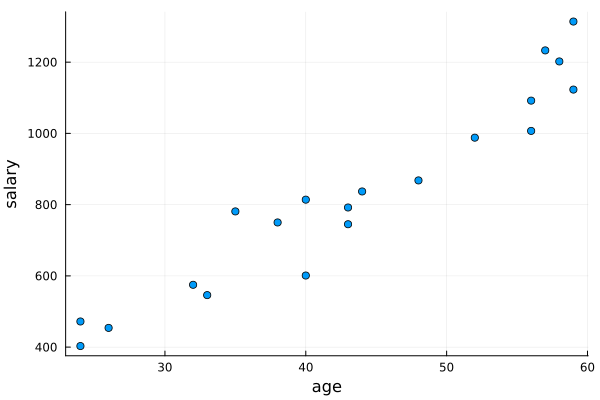

In [6]:
# StatsPlots 
@df age_salary scatter(:X, :Y, xlabel="age", ylabel="salary", label="")

In [7]:
@model function linear_regression(x, y)
    # prior distribution
    a ~ Normal(0, 1000)
    b ~ Normal(0, 1000)
    σ² ~ truncated(Normal(0, 100), lower=0)
    μ = a .+ b .* x

    for i = 1 : length(x)
        y[i] ~ Normal(μ[i], σ²)
    end
end

linear_regression (generic function with 2 methods)

In [8]:
age = age_salary[!, :X]
salary = age_salary[!, :Y]
chain = sample(linear_regression(age, salary), NUTS(), 1000)

# convergence criterion: rhat < 1.1

┌ Info: Found initial step size
└   ϵ = 1.52587890625e-6
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×17×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 5.36 seconds
Compute duration  = 5.36 seconds
parameters        = a, b, σ²
internals         = n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, lp, logprior, loglikelihood

Summary Statistics
  parameters        mean       std      mcse   ess_bulk   ess_tail      rhat   ⋯
      Symbol     Float64   Float64   Float64    Float64    Float64   Float64   ⋯

           a   -116.2079   76.9663    3.8369   396.9444   444.0809    1.0040   ⋯
           b     21.8387    1.6941    0.0835   411.2736   424.5581    1.0067   ⋯
          σ²     83.1329   14.5083    0.6932   423.0172   417.4308    1.0018   ⋯
                                                                1 column omitted

Quantiles
  parameters        2.5%      

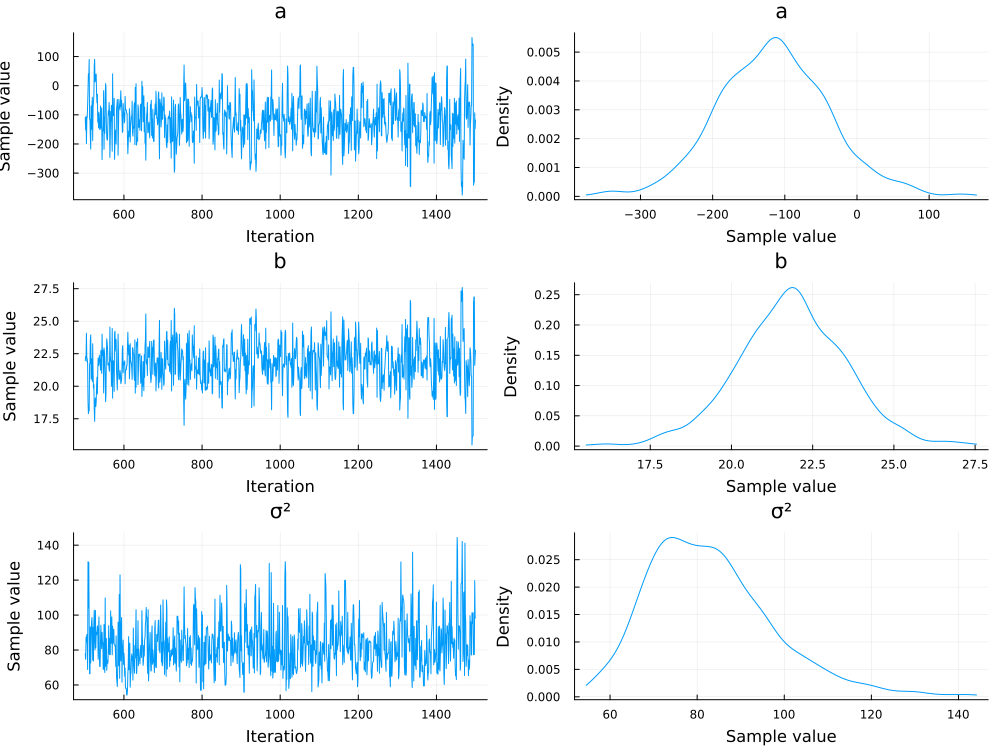

In [9]:
plot(chain)

In [10]:
DataFrame(chain)

Row,iteration,chain,a,b,σ²,n_steps,is_accept,acceptance_rate,log_density,hamiltonian_energy,hamiltonian_energy_error,max_hamiltonian_energy_error,tree_depth,numerical_error,step_size,nom_step_size,lp,logprior,loglikelihood
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,501,1,-109.363,21.969,77.87,15.0,1.0,0.953861,-131.49,131.981,-0.0772792,-0.314217,3.0,0.0,0.213663,0.213663,-135.845,-20.7938,-115.052
2,502,1,-151.702,22.3012,74.6767,13.0,1.0,0.970278,-131.632,132.502,0.026627,0.119359,3.0,0.0,0.213663,0.213663,-135.946,-20.7749,-115.171
3,503,1,-105.186,22.1547,87.4085,11.0,1.0,0.796446,-132.416,133.709,0.26668,0.944314,3.0,0.0,0.213663,0.213663,-136.886,-20.8721,-116.014
4,504,1,-198.467,24.0719,84.6371,15.0,1.0,0.442911,-132.644,136.977,-0.308209,2.3043,3.0,0.0,0.213663,0.213663,-137.082,-20.8625,-116.22
5,505,1,-113.982,21.8933,88.8469,47.0,1.0,0.877337,-131.684,133.669,-0.154787,0.852949,5.0,0.0,0.213663,0.213663,-136.171,-20.8858,-115.285
6,506,1,-107.525,22.1225,85.4692,11.0,1.0,0.88544,-132.107,132.802,0.237158,0.269482,3.0,0.0,0.213663,0.213663,-136.556,-20.8556,-115.7
7,507,1,-68.1979,21.7421,68.8281,7.0,1.0,0.586547,-135.572,137.431,1.26443,2.8498,2.0,0.0,0.213663,0.213663,-139.804,-20.7238,-119.08
8,508,1,-18.0177,18.8482,130.529,15.0,1.0,1.0,-136.881,139.158,-1.19418,-2.1082,3.0,0.0,0.213663,0.213663,-141.753,-21.3366,-120.416
9,509,1,40.8561,17.8908,104.225,15.0,1.0,0.96261,-135.054,138.3,-0.167261,-0.609054,4.0,0.0,0.213663,0.213663,-139.701,-21.0285,-118.672


In [11]:
age_pred = collect(20 : 60)
μ = chain[:a] .+ chain[:b] .* age_pred'
mean_pred = mean(μ, dims=1)'
salary_pred = rand.(Normal.(μ, chain[:σ²]))

1000×41 Matrix{Float64}:
 148.678    490.555  426.637  368.848  …  1167.6    1179.84   1141.62
  86.4589   239.183  297.44   302.029     1120.37   1277.07   1238.31
 252.715    336.343  205.714  409.98      1101.72   1161.39   1297.98
 381.373    142.086  296.728  364.861     1185.56   1183.53   1324.3
 332.934    373.353  349.448  432.828     1212.93   1094.36   1121.14
 486.011    250.208  275.593  398.884  …  1346.95   1266.69   1124.0
 270.611    356.6    486.012  363.786     1303.63   1234.3    1323.45
 464.213    296.133  426.465  463.27      1087.35   1209.65    880.369
 299.389    434.708  316.187  477.037      962.753  1373.18    927.084
 480.307    484.955  485.309  511.218     1079.09   1161.57   1160.61
 256.9      485.726  461.482  518.847  …  1044.13   1132.0    1257.59
 284.27     364.746  455.196  315.749     1082.75   1162.9    1274.36
 359.838    368.177  318.645  418.09      1103.88   1134.85   1188.85
   ⋮                                   ⋱                         

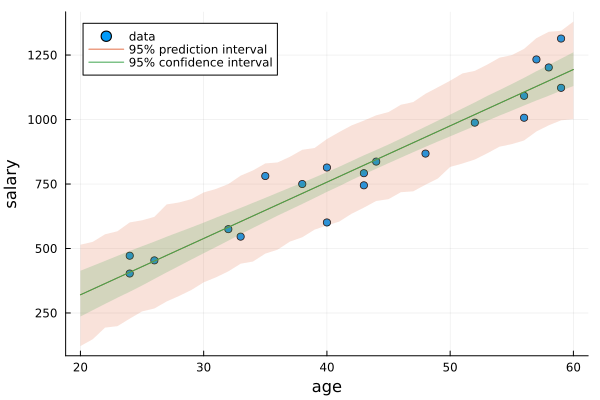

In [12]:
# 95% 信頼区間
lower_conf = [quantile(μ[:, i], 0.025) for i = 1 : length(age_pred)]
upper_conf = [quantile(μ[:, i], 0.975) for i = 1 : length(age_pred)]

# 95% 予測区間
lower_pred = [quantile(salary_pred[:, i], 0.025) for i = 1 : length(age_pred)]
upper_pred = [quantile(salary_pred[:, i], 0.975) for i = 1 : length(age_pred)]

scatter(age_salary[!, :X], age_salary[!, :Y], xlabel="age", ylabel="salary", label="data")
plot!(age_pred, mean_pred, ribbon=(mean_pred .- lower_pred, upper_pred .- mean_pred), fillalpha=0.2, label="95% prediction interval")
plot!(age_pred, mean_pred, ribbon=(mean_pred .- lower_conf, upper_conf .- mean_pred), fillalpha=0.2, label="95% confidence interval")

# 練習問題

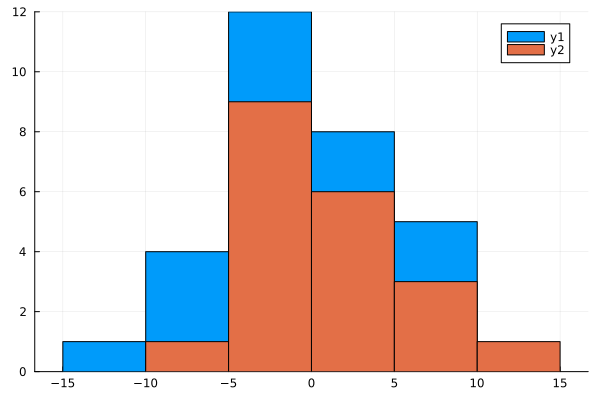

In [ ]:
Y1 = rand(Normal(0, 5), 30)
Y2 = rand(Normal(1, 4), 20)

In [19]:
# Student's t-test
# assuming same σ
@model function Student_t_test(data1, data2)
    # prior distribution 
    μ1 ~ Normal(0, 100)
    μ2 ~ Normal(0, 100)
    σ ~ truncated(Normal(0, 100), lower=0)

    for i = 1 : length(data1)
        data1[i] ~ Normal(μ1, σ)
    end
    for i = 1 : length(data2)
        data2[i] ~ Normal(μ2, σ)
    end
end

Student_t_test (generic function with 2 methods)

In [20]:
chain = sample(Student_t_test(Y1, Y2), NUTS(), 1000)

┌ Info: Found initial step size
└   ϵ = 0.0015625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×17×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.09 seconds
Compute duration  = 4.09 seconds
parameters        = μ1, μ2, σ
internals         = n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, lp, logprior, loglikelihood

Summary Statistics
  parameters      mean       std      mcse    ess_bulk   ess_tail      rhat    ⋯
      Symbol   Float64   Float64   Float64     Float64    Float64   Float64    ⋯

          μ1    0.0196    0.8811    0.0260   1173.8774   654.8114    1.0003    ⋯
          μ2    0.7539    1.1043    0.0314   1252.4750   725.8954    1.0027    ⋯
           σ    4.8699    0.5086    0.0154   1083.2665   517.2032    1.0009    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25

In [26]:
# prob(μ1 < μ2)
df = DataFrame(chain)

c = 0
for sample in eachrow(df) 
    if sample.μ1 < sample.μ2
        c += 1
    end
end

prob = c / nrow(df)

0.707

In [27]:
# Welch's t-test
@model function Welch_t_test(data1, data2)
    # prior distribution 
    μ1 ~ Normal(0, 100)
    μ2 ~ Normal(0, 100)
    σ1 ~ truncated(Normal(0, 100), lower=0)
    σ2 ~ truncated(Normal(0, 100), lower=0)

    for i = 1 : length(data1)
        data1[i] ~ Normal(μ1, σ1)
    end
    for i = 1 : length(data2)
        data2[i] ~ Normal(μ2, σ2)
    end
end

Welch_t_test (generic function with 2 methods)

In [28]:
chain2 = sample(Welch_t_test(Y1, Y2), NUTS(), 1000)

┌ Info: Found initial step size
└   ϵ = 0.025
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×18×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.82 seconds
Compute duration  = 4.82 seconds
parameters        = μ1, μ2, σ1, σ2
internals         = n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, lp, logprior, loglikelihood

Summary Statistics
  parameters      mean       std      mcse    ess_bulk   ess_tail      rhat    ⋯
      Symbol   Float64   Float64   Float64     Float64    Float64   Float64    ⋯

          μ1    0.0061    0.9291    0.0328    797.4623   674.5299    1.0025    ⋯
          μ2    0.8004    1.0663    0.0281   1423.4696   816.1484    1.0002    ⋯
          σ1    5.2869    0.6946    0.0215   1112.4817   441.0622    1.0088    ⋯
          σ2    4.6641    0.8365    0.0248   1079.6517   706.0055    0.9990    ⋯
                                   

In [29]:
# prob(μ1 < μ2)
df = DataFrame(chain2)

c = 0
for sample in eachrow(df) 
    if sample.μ1 < sample.μ2
        c += 1
    end
end

prob = c / nrow(df)

0.718